# (Bikeshare Data)
## by (mohamed tahoun)



> Bicycle-sharing systems allow users to rent bicycles on a very short-term basis for a price. This allows people to borrow a bike from point A and return it at point B, though they can also return it to the same location if they'd like to just go for a ride. Regardless, each bike can serve several users per day.Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used. this data is about bikeshare systems in Chicago.

In [28]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [29]:
#load data
df_n = pd.read_csv('chicago1.csv')
print(df_n.head())

   Unnamed: 0           Start Time             End Time  Trip Duration  \
0     1423854  2017-06-23 15:09:32  2017-06-23 15:14:53            321   
1      955915  2017-05-25 18:19:03  2017-05-25 18:45:53           1610   
2        9031  2017-01-04 08:27:49  2017-01-04 08:34:45            416   
3      304487  2017-03-06 13:49:38  2017-03-06 13:55:28            350   
4       45207  2017-01-17 14:53:07  2017-01-17 15:02:01            534   

                   Start Station                   End Station   User Type  \
0           Wood St & Hubbard St       Damen Ave & Chicago Ave  Subscriber   
1            Theater on the Lake  Sheffield Ave & Waveland Ave  Subscriber   
2             May St & Taylor St           Wood St & Taylor St  Subscriber   
3  Christiana Ave & Lawrence Ave  St. Louis Ave & Balmoral Ave  Subscriber   
4         Clark St & Randolph St  Desplaines St & Jackson Blvd  Subscriber   

   Gender  Birth Year  
0    Male      1992.0  
1  Female      1992.0  
2    Male     

In [30]:
#drop null values
df_n.dropna(inplace = True)

In [31]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238948 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     238948 non-null  int64  
 1   Start Time     238948 non-null  object 
 2   End Time       238948 non-null  object 
 3   Trip Duration  238948 non-null  int64  
 4   Start Station  238948 non-null  object 
 5   End Station    238948 non-null  object 
 6   User Type      238948 non-null  object 
 7   Gender         238948 non-null  object 
 8   Birth Year     238948 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 18.2+ MB


### What is/are the main feature(s) of interest in your dataset?

> Trip Duration, User Type, Gender and Birth Year. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Gender and Birth Year.

## Univariate Exploration

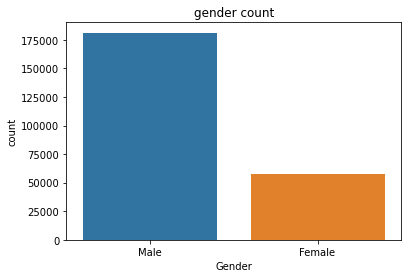

In [32]:
#univariate exploration for gender
sb.countplot(data = df_n, x = 'Gender');
plt.title("gender count");

it is clear that the men use bike more than female And therefore The most targeted group in the coming period is women

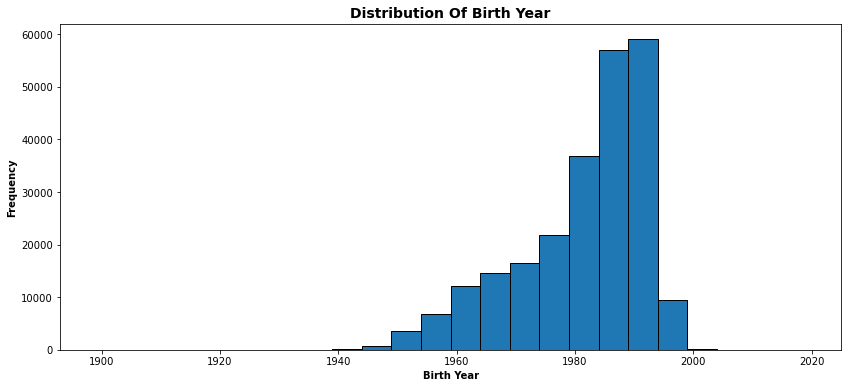

In [33]:
#univariate exploration for brith year
def myHistPlot(df, xVar ,bins = 30, figsize = [14,6]):
    # plot
    df[xVar].hist (bins=bins,
             grid=False,
             edgecolor='black',
             figsize=figsize);
    # for labels, add a space instead of underscore
    xVar=xVar.replace ("_"," ")
    # Add title and format it
    plt.title(f'Distribution of {xVar}'.title(), fontsize = 14, weight = "bold") 
    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel ('Frequency'.title(), fontsize = 10, weight = "bold") 
# intervals
bins = np.arange (df_n[ 'Birth Year'].min(), df_n[ 'Birth Year'].max ( )+5, 5)
myHistPlot (df_n, 'Birth Year', bins=bins)

it is clear that the youth is the most segment that use bike so we must target them to gain more profits

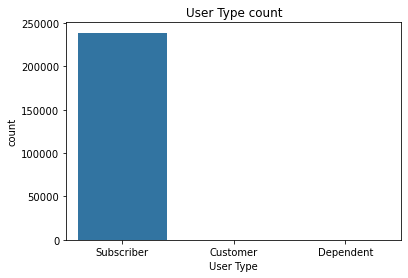

In [34]:
#univariate exploration for user type
sb.countplot(data = df_n, x = 'User Type');
plt.title("User Type count");

it is clear that number of subscriber is more than any other kind that we must take care of that.

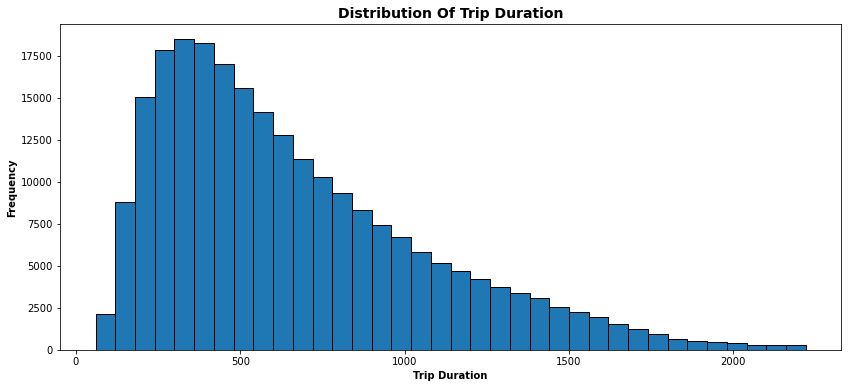

In [35]:
#univariate exploration for Trip Duration
bins = np.arange (df_n[ 'Trip Duration'].min(), df_n['Trip Duration'].quantile(0.99)+60, 60) 
myHistPlot(df_n,'Trip Duration', bins=bins)

Most of the trips are around 500 second.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> it is clear that the men use bike more than female ,it is clear that the youth is the most segment that use bike ,it is clear that number of subscriber is more than any other kind.

## Bivariate Exploration

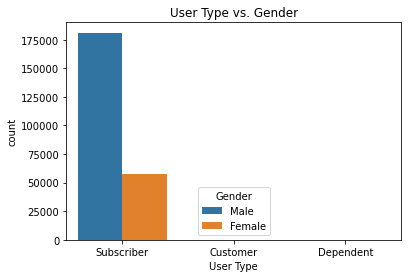

In [36]:
#bivariate exploration for User Type and Gender
sb.countplot(data = df_n, x = 'User Type', hue = 'Gender');
plt.title("User Type vs. Gender");

male subscriber is the most segment use bikes.

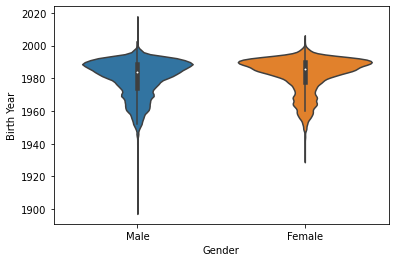

In [37]:
#bivariate exploration for Gender and Birth Year
sb.violinplot(data=df_n, x='Gender', y='Birth Year');

most females that use bike is youth.

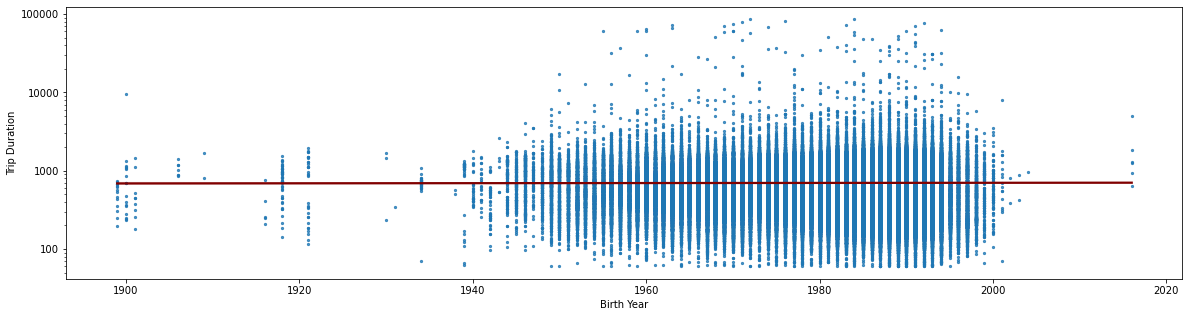

In [38]:
#bivariate exploration for Trip Duration and Birth Year
plt.figure (figsize = [20, 5])
sb.regplot (data = df_n, x = 'Birth Year', y = 'Trip Duration',scatter_kws = {"s":5},line_kws = {"color": "maroon"})
plt.yscale('log'); 
plt.yticks ( [100,1000,10000,100000], [100,1000,10000,100000]);
                                                                 

pepole in age from 10 to 60 have long trip duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> it is clear that there is small number of customer male and female, median age of male and female that use bike almost equal.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

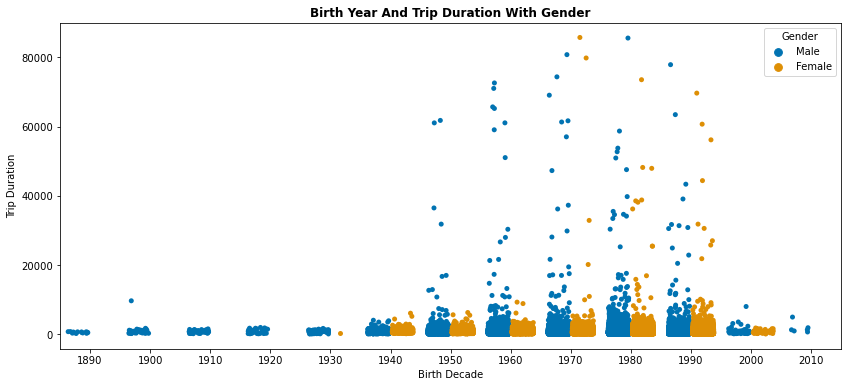

In [39]:
# create a birth decade variable, using floor division (lowest integer divisor)
df_n[ 'Birth Decade']=( (df_n[ 'Birth Year']//10 ) *10).astype (int)
                                                                       
#set plot dimensions
plt.figure (figsize=[14, 6] )
# plot
sb.stripplot(data = df_n, x = 'Birth Decade', y = 'Trip Duration', hue = 'Gender', 
             jitter=0.35, dodge=True, palette = 'colorblind');
plt.title('Birth Year and Trip Duration with Gender'.title(), weight="bold");

With age, men tend to ride bicycles

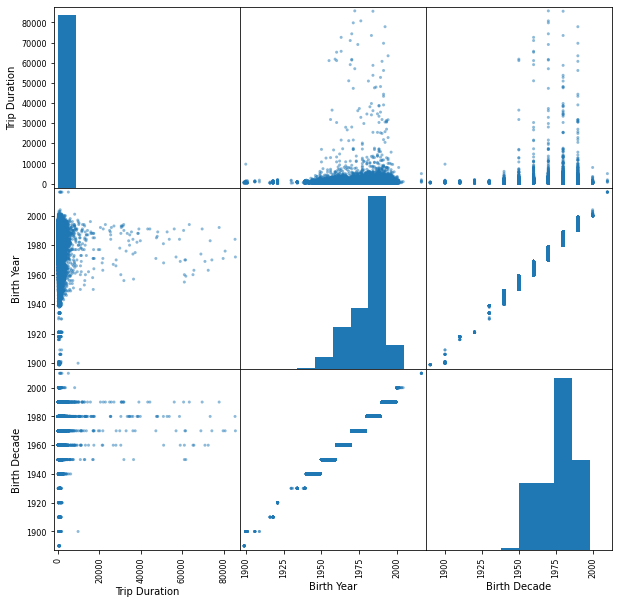

In [40]:
#scatter matrix
df_m = df_n.iloc[:, 1:];
df_m
pd.plotting.scatter_matrix(df_m, figsize = (10,10));

most users from 10 to 50 years old.

Text(0.5, 1.0, 'user type and gender with trip duration')

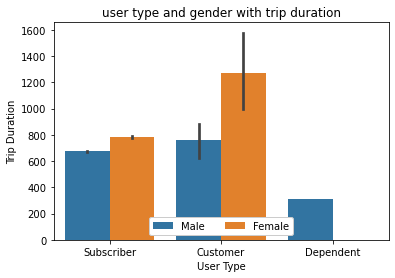

In [41]:
ax = sb.barplot(data = df_n, x = 'User Type', y = 'Trip Duration', hue = 'Gender')
ax.legend (loc = 8, ncol = 3, framealpha = 1);
plt.title('user type and gender with trip duration')

female customer and subscriber have longe trip duration

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Young males are the ones who take longer trips and female customer and subscriber have longe trip duration.



> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!